In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.util.systems import system_from_str
from dsn.train_dsn import train_dsn
from dsn.util.plot_util import plot_opt, plot_phis, plot_T_phis, assess_constraints
import scipy.stats
import seaborn as sns
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# filename info
basedir = '/Users/sbittner/Documents/dsn/dsn/results/';

system_str = 'V1_circuit';
system_dir = 'V1_circuit_SV'

# system parameters
behavior_str = 'ss_SV';
param_str = 'h';
T = 20;
dt = 0.25;
init_conds = np.expand_dims(np.array([1.0, 1.1, 1.2, 1.3]), 1);

system_class = system_from_str(system_str);
system = system_class(behavior_str, param_str, T, dt, init_conds);

# optimization hyperparameters
nlayers = 10;
sigma_init = 1.0;
c_init = -4;

num_rs = 5
start_rs = 1;

fnames = [];
legendstrs = [];
for rs in range(start_rs, start_rs+num_rs):
    savedir = basedir + system_dir + '/' \
          'V1_circuit_D=8_flow=M_%dP_sigma=%.2f_lr_order=-3_c=%d_rs=%d/' % \
          (nlayers, sigma_init, c_init, rs);
    fname = savedir + 'results.npz';
    fnames.append(fname);
    legendstr = 'rs=%d' % rs;
    legendstrs.append(legendstr);
    
    if (rs==start_rs):
        npzfile = np.load(fnames[0]);
        mu = npzfile['mu'];
        check_rate = npzfile['check_rate'];
        last_ind = npzfile['it']//check_rate;
        nits = npzfile['costs'].shape[0];
        k_max = npzfile['T_phis'].shape[0]-1;
        iterations = np.arange(0, check_rate*nits, check_rate);
    

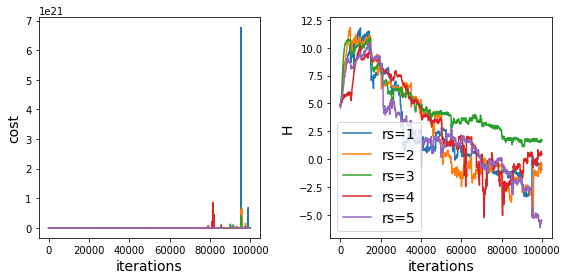

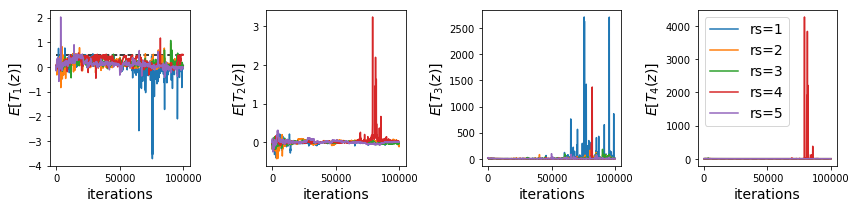

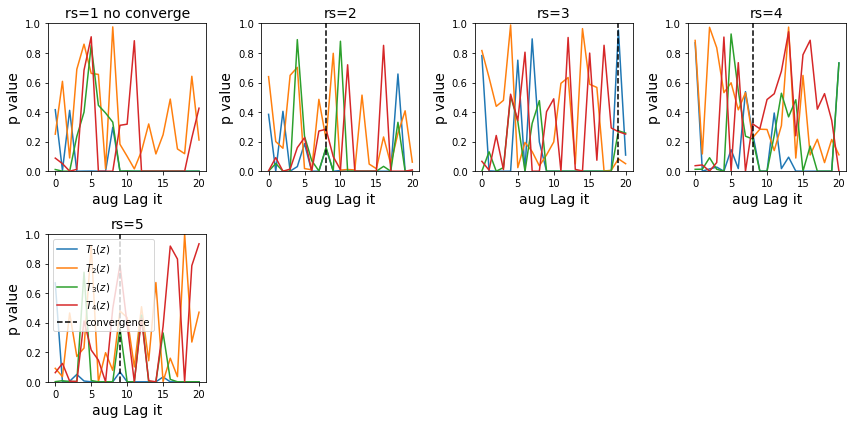

In [11]:
plot_opt(fnames, legendstrs, plotR2=False);

rs=1 has not converged so not plotting.


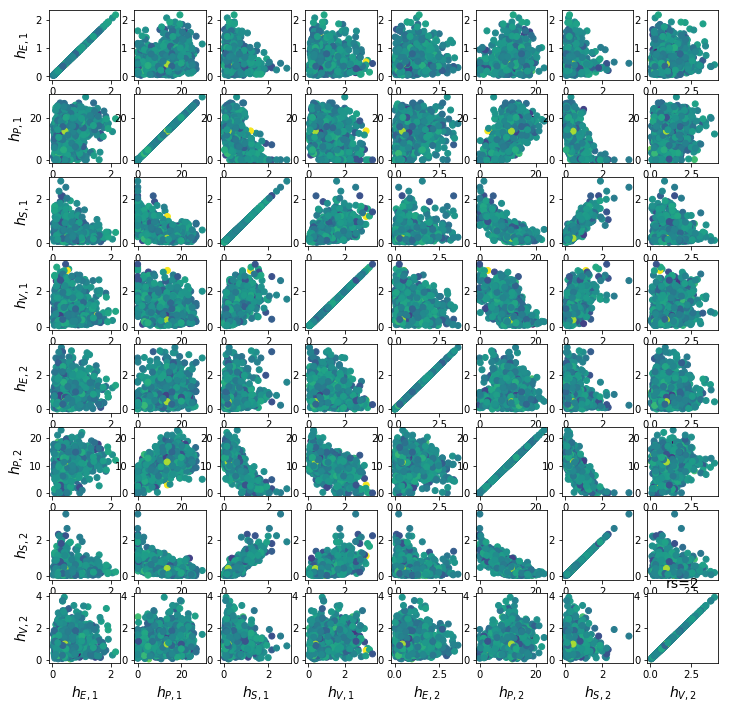

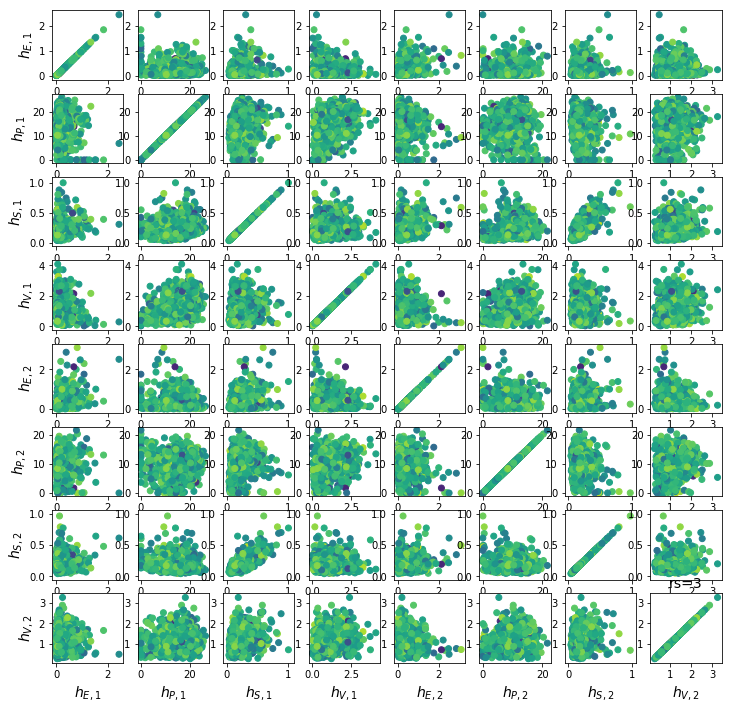

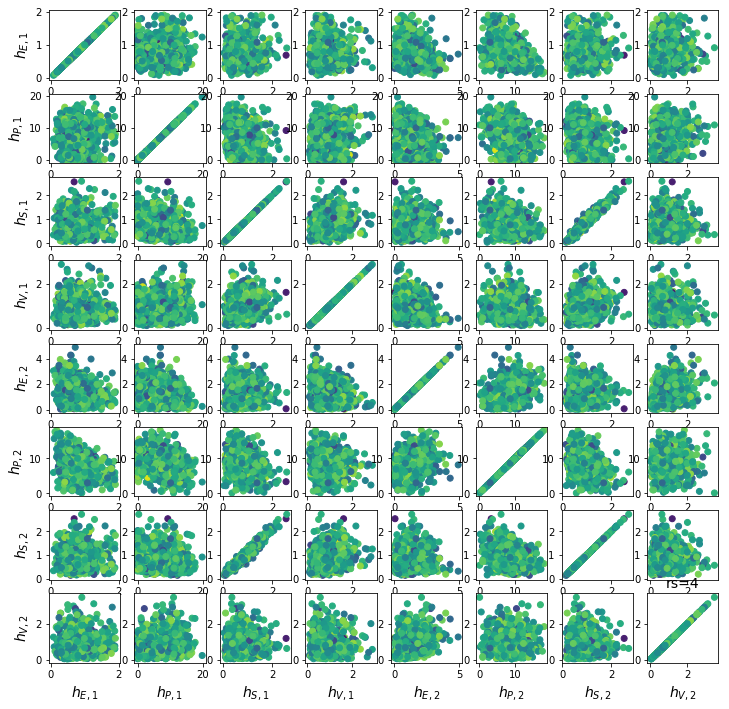

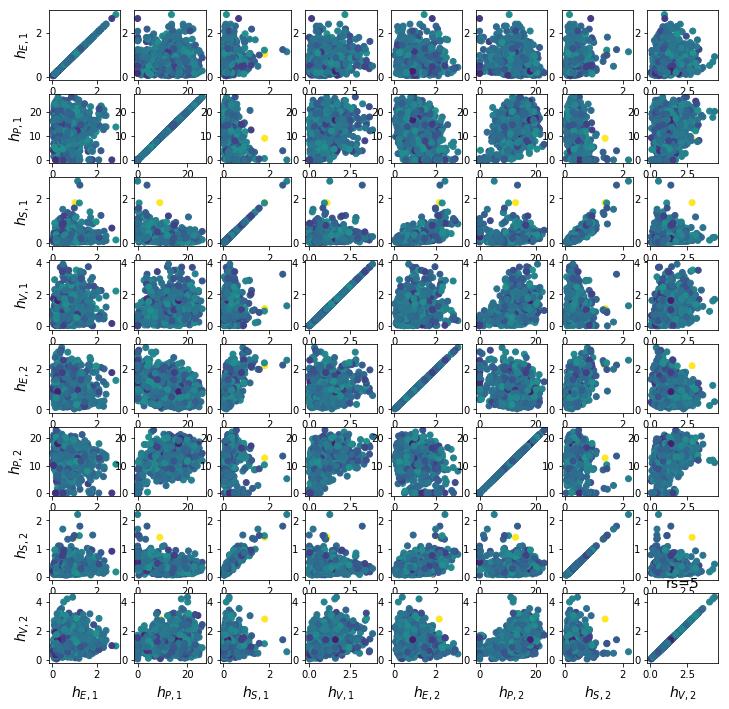

In [16]:
n_fnames = len(fnames);
alpha = 0.05;
p_values, AL_final_its = assess_constraints(fnames, alpha, k_max, mu, system.num_suff_stats);
labels = [r'$h_{E,1}$', r'$h_{P,1}$', r'$h_{S,1}$', r'$h_{V,1}$', \
          r'$h_{E,2}$', r'$h_{P,2}$', r'$h_{S,2}$', r'$h_{V,2}$']
plot_phis(fnames, system.D, labels, legendstrs, AL_final_its);

rs=1 has not converged so not plotting.


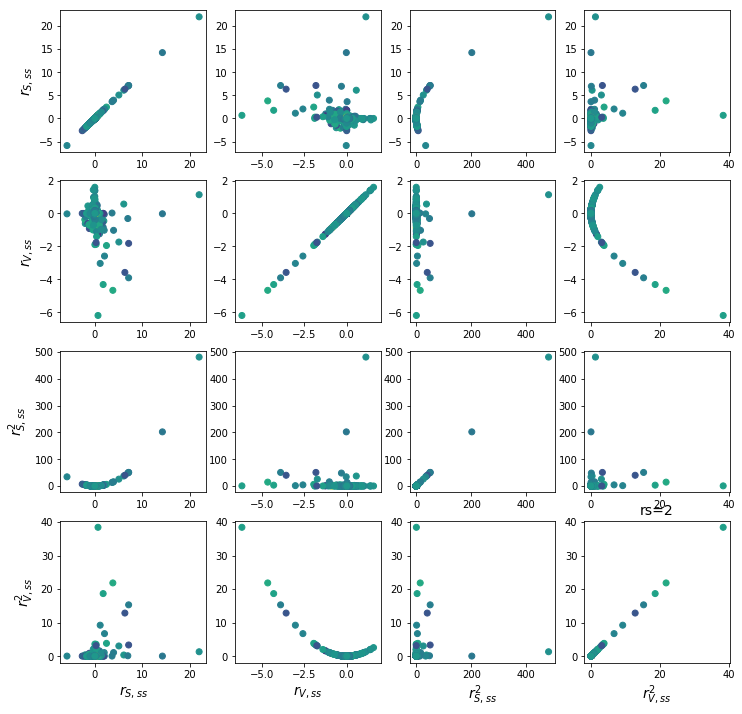

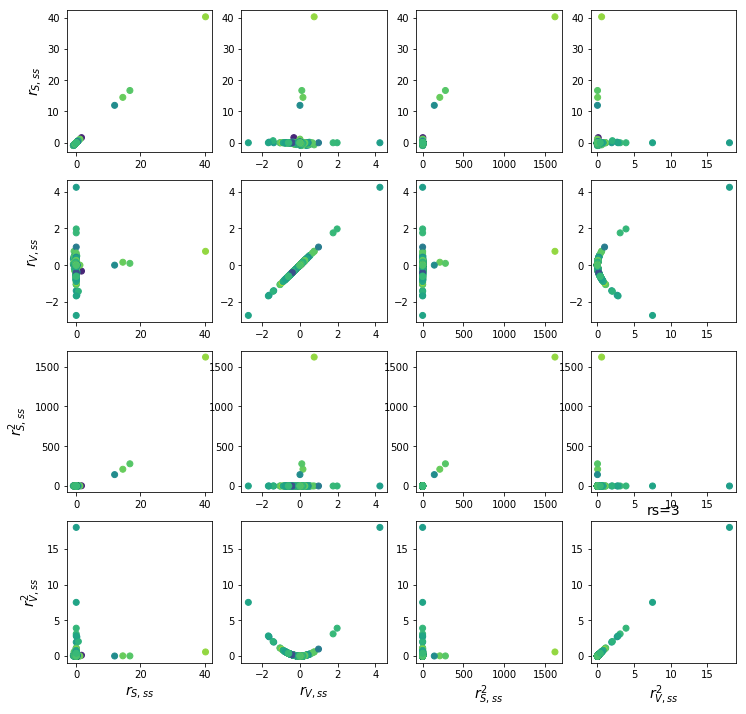

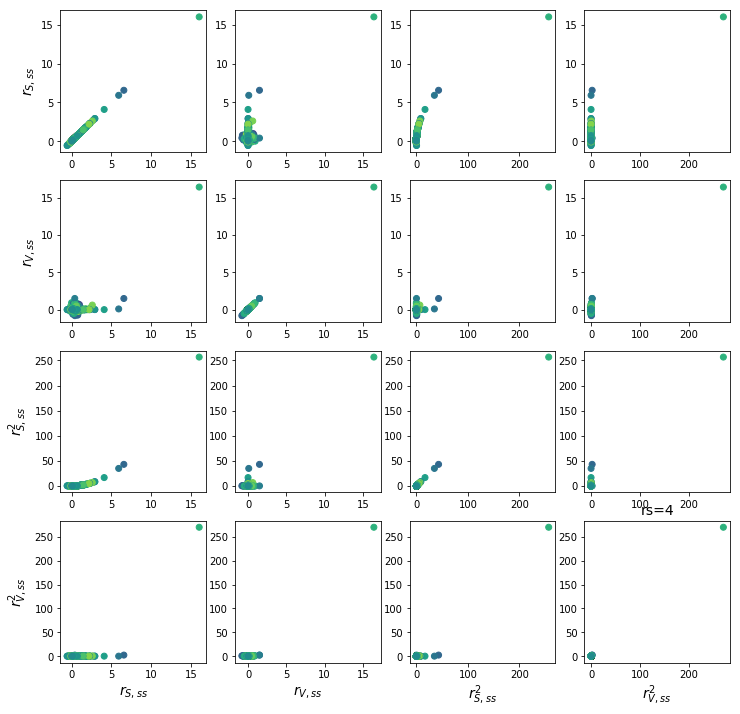

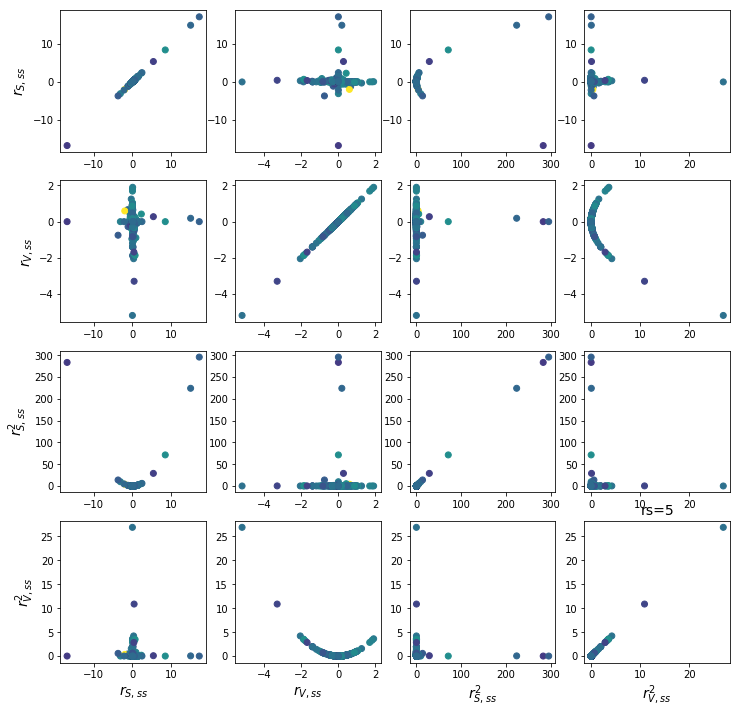

In [15]:
#labels = [r'$r_{E,ss}$', r'$r_{P,ss}$', r'$r_{S,ss}$', r'$r_{V,ss}$', \
#          r'$r_{E,ss}^2$', r'$r_{P,ss}^2$', r'$r_{S,ss}^2$', r'$r_{V,ss}^2$']
labels = [r'$r_{S,ss}$', r'$r_{V,ss}$', \
          r'$r_{S,ss}^2$', r'$r_{V,ss}^2$']
plot_T_phis(fnames, system.num_suff_stats, labels, legendstrs, AL_final_its);
